<a href="https://colab.research.google.com/github/douglascdev/fake_stock_price/blob/main/fake_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quantumrandom

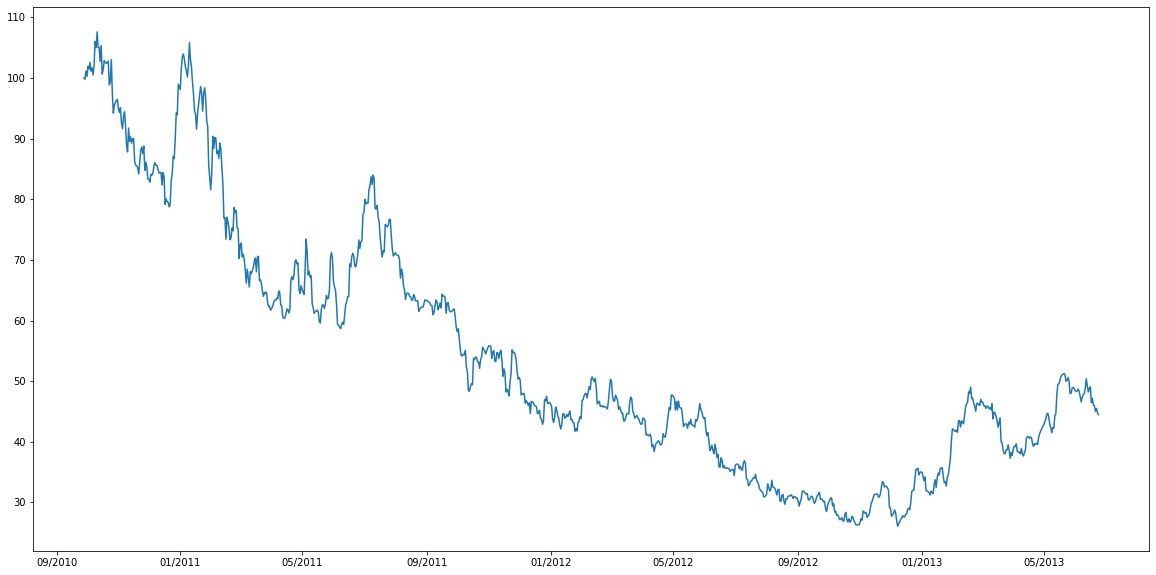

In [ ]:
import random
from datetime import datetime, timedelta

import numpy as np
import quantumrandom

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import concurrent.futures


def get_true_random_data(array_length: int = 1024):
    """
    Returns infinite ints obtained from quantumrandom calling their API every array_length number of ints
    :param array_length:
    :return:
    """
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(quantumrandom.get_data, array_length=array_length) for _ in range(10)]
        while True:
            res = futures.pop(0).result()
            if not futures:
                futures += [executor.submit(quantumrandom.get_data, array_length=array_length) for _ in range(5)]
            for i in res:
                yield i


random_data_iterator = iter(get_true_random_data())


def get_true_random_normalized(n: int):
    """
    get_truly_random_data normalized from 0 to 1 values
    :param n:
    :return:
    """
    for _, seed in zip(range(n), random_data_iterator):
        random.seed(seed)
        yield random.random()


def true_random_choices(population, weights):
    while True:
        random.seed(next(random_data_iterator))
        yield random.choices(population, weights, k=1).pop()


def generate_weighted_random_variation():
    # weights = [10000, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
    #            0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
    #            0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    weights = [10000]
    weights += [0.01] * 5
    weights += [0.05] * 5
    weights += [0.001] * 50

    random_population = sorted(get_true_random_normalized(len(weights)))
    return next(iter(true_random_choices(random_population, weights)))


def gen_positive() -> bool:
    random.seed(next(random_data_iterator))
    return bool(random.getrandbits(1))


def generate_random_data(data_size: int, initial_value: int = 40):
    values = [initial_value]
    last_value = initial_value
    for _ in range(data_size):
        percent_variation = generate_weighted_random_variation()
        variation = percent_variation if gen_positive() else -percent_variation
        last_value = round(last_value + (last_value * variation), 2)
        if last_value < 0:
            last_value = 0
        values.append(last_value)
    return values


def main():
    data = generate_random_data(data_size=1000, initial_value=100)
    with open("data.txt", "w") as data_file:
        data_file.write(str(data))

    y = np.array(data)
    x = np.array([datetime(2010, 9, 28, 0, 0) + timedelta(days=i) for i in range(len(y))])

    plt.rcParams["figure.figsize"] = (20, 10)
    plt.plot(x, y)

    xformatter = mdates.DateFormatter('%m/%Y')
    plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)

    plt.show()


if __name__ == "__main__":
    main()
